<a href="https://colab.research.google.com/github/MHC-FA24-CS341CV/beyond-the-pixels-emerging-computer-vision-research-topics-fa24/blob/main/02_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02 Object Detection (YOLOv9 & YOLOv10)**

## **Import Statements**

In [ ]:
import os
from google.colab import userdata # for RoboFlow API key
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown, display # for displaying relative values

Checking current working directory

In [ ]:
HOME = os.getcwd()
print(HOME)

/content/datasets


## **Setting up environment**
This model require GPU to run on Google Colab for efficiency reasons. First, we can change runtime type to GPU T4 but doing `Edit` > `Notebook Settings` > `T4 GPU` and save.
Notice: GPU for free on colab restrict your time, read more <a href=https://research.google.com/colaboratory/tos_v5.html> here</a>.

We need to activate the GPU using `!nvidia-smi`, due to colab not working well at the time writing this I had to switch all install or terminal running to `os.system(command)`. Install ultralytics (important), and roboflow (for dataset)

In [ ]:
os.system("nvidia-smi")

0

In [ ]:
os.system('pip install ultralytics')
import ultralytics
ultralytics.checks()

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
os.system("pip install -q roboflow")

0

Create datasets folder and import the

In [ ]:
os.system("mkdir {HOME}/datasets")
os.system(f"cd {HOME}/datasets")

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-100").project("chess-pieces-mjzgj")
version = project.version(2)

os.system(f"cd {HOME}")

loading Roboflow workspace...
loading Roboflow project...


0

In [ ]:
dataset = version.download("yolov9")
model = YOLO("yolov9s.pt")
model.info()
results = model.train(name="v9_epoch20", data=f"{dataset.location}/data.yaml", batch=12, epochs=20, imgsz=640)

100%|██████████| 14.7M/14.7M [00:00<00:00, 46.9MB/s]


YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs


(917, 7318368, 0, 27.5552768)

In [ ]:
dataset = version.download("yolov8")
model = YOLO("yolov10n.pt")
results = model.train(name="v10_epoch20", data=f"{dataset.location}/data.yaml", batch=12, epochs=20, imgsz=640)

100%|██████████| 5.59M/5.59M [00:00<00:00, 311MB/s]

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/datasets/chess-pieces-2/data.yaml, epochs=20, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

 20                  -1  1     18048  ultralytics.nn.modules.block.SCDown          [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1    282624  ultralytics.nn.modules.block.C2fCIB          [384, 256, 1, True, True]     
 23        [16, 19, 22]  1    866398  ultralytics.nn.modules.head.v10Detect        [13, [64, 128, 256]]          
YOLOv10n summary: 385 layers, 2,712,110 parameters, 2,712,094 gradients, 8.4 GFLOPs

Transferred 493/595 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/chess-pieces-2/train/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/chess-pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.220780ebecb8e59ab9cc30c7d9856deb.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/chess-pieces-2/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.00046875), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.85G      2.798      9.005      2.132        355        640: 100%|██████████| 17/17 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         58        386          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.69G      2.248      7.276      1.875        181        640: 100%|██████████| 17/17 [00:06<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         58        386     0.0182      0.667       0.15     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.6G      2.234      6.087      1.868        137        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]


                   all         58        386     0.0242      0.758      0.259      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.52G      2.197        5.2      1.837        195        640: 100%|██████████| 17/17 [00:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         58        386     0.0232      0.871      0.337      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.48G      2.194      4.529      1.859        122        640: 100%|██████████| 17/17 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         58        386      0.833      0.087      0.379      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.4G      2.139      4.014      1.829        201        640: 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         58        386      0.853      0.206       0.39      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.79G      2.161       3.86      1.843        289        640: 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         58        386      0.695      0.296      0.459      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.49G      2.093      3.462      1.851        128        640: 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         58        386      0.554      0.462        0.6      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.64G      2.077      3.328      1.817        172        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         58        386      0.502      0.572      0.643      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.64G      2.072      3.256      1.819        185        640: 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


                   all         58        386      0.552      0.626       0.65      0.491
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.36G      1.869      3.842      1.818        166        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         58        386       0.54      0.619       0.67      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G      1.811      3.272       1.79        162        640: 100%|██████████| 17/17 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         58        386       0.51      0.689      0.714      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.36G       1.82      3.129      1.805         71        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         58        386      0.555      0.743      0.754      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.36G      1.755      3.036      1.788        101        640: 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         58        386      0.577      0.704      0.751       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.36G       1.76      2.913      1.786         55        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         58        386      0.611      0.802      0.788      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G      1.787       2.99      1.799         68        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         58        386      0.676      0.775      0.818      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.36G       1.72      2.958      1.789         86        640: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386      0.709      0.739      0.836      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.36G      1.669      2.672      1.769         69        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         58        386      0.692      0.796      0.834      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.36G      1.646      2.653      1.779        167        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]


                   all         58        386      0.674      0.835      0.835      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.36G      1.672      2.621      1.757        100        640: 100%|██████████| 17/17 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         58        386      0.684      0.816      0.833      0.668



20 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,699,486 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


                   all         58        386      0.675      0.834      0.835      0.669
          black-bishop         13         22      0.822       0.42      0.786      0.582
            black-king         29         29      0.619      0.671      0.735      0.612
          black-knight         26         30      0.562      0.767      0.776      0.657
            black-pawn         25         77      0.674      0.987      0.925      0.739
           black-queen         11         11       0.96      0.909      0.955      0.727
            black-rook         24         28      0.587      0.929      0.926      0.717
          white-bishop         17         22      0.794      0.818      0.857      0.688
            white-king         29         29      0.663      0.966      0.887      0.728
          white-knight         17         19       0.63      0.947      0.764       0.62
            white-pawn         26         77       0.77      0.958      0.963       0.77
           white-quee

Text(0.5, 1.0, 'Average training precision for 20 epoch')

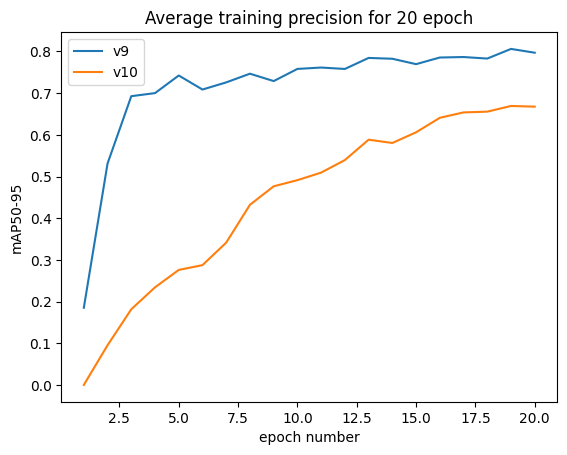

In [ ]:
datav9 = pd.read_csv(f"{HOME}/runs/detect/v9_epoch20/results.csv")
datav10 = pd.read_csv(f"{HOME}/runs/detect/v10_epoch20/results.csv")

plt.plot(datav9['epoch'], datav9['metrics/mAP50-95(B)'])
plt.plot(datav10['epoch'], datav10['metrics/mAP50-95(B)'])
plt.legend(["v9", "v10"])
plt.xlabel("epoch number")
plt.ylabel("mAP50-95")
plt.title("Average training precision for 20 epoch")

In [ ]:
dataset = version.download("yolov9")
model = YOLO("yolov9s.pt")
model.info()
results = model.train(name="v9_epoch50", data=f"{dataset.location}/data.yaml", batch=12, epochs=50, imgsz=640)

YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/datasets/chess-pieces-2/data.yaml, epochs=50, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v9_epoch50, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning /content/datasets/chess-pieces-2/train/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/chess-pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.220780ebecb8e59ab9cc30c7d9856deb.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/chess-pieces-2/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs/detect/v9_epoch50/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/v9_epoch50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.04G      1.443      3.935      1.192        355        640: 100%|██████████| 17/17 [00:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         58        386      0.145      0.565      0.279      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.92G      1.089      1.592      1.019        181        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         58        386      0.645      0.693      0.724      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.92G      1.044      1.092       1.01        137        640: 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         58        386      0.853      0.857       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.94G     0.9682     0.8771      0.976        195        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         58        386      0.932       0.91      0.974      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.95G     0.9896      0.756       0.99        122        640: 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         58        386      0.977      0.964      0.981      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.95G     0.9743     0.6999     0.9784        201        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         58        386      0.936      0.964      0.983       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.01G     0.9551      0.675     0.9749        289        640: 100%|██████████| 17/17 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         58        386      0.926      0.935      0.979      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.05G     0.9047     0.6087     0.9678        128        640: 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         58        386      0.966       0.96      0.984      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.16G     0.8873     0.5611     0.9505        172        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         58        386      0.963      0.962      0.986      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.02G     0.8805     0.5564     0.9491        185        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         58        386      0.965      0.963      0.985      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.09G      0.888     0.5167     0.9483         96        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         58        386      0.981      0.969      0.989      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.01G     0.8553     0.5086     0.9442        133        640: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         58        386      0.976      0.965      0.987       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.97G     0.8379     0.4901     0.9396         82        640: 100%|██████████| 17/17 [00:10<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]


                   all         58        386      0.974      0.981      0.989      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.96G     0.8466      0.495      0.929        147        640: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]


                   all         58        386      0.984      0.978      0.988      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.09G     0.8427     0.4827     0.9418        175        640: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386      0.984      0.983      0.985      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.09G      0.808     0.4773     0.9262        201        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         58        386       0.98      0.982      0.987      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.95G     0.8025     0.4713     0.9283        170        640: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         58        386      0.981      0.983      0.988      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.92G     0.7907     0.4849     0.9306        188        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         58        386      0.981      0.984      0.989      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.13G     0.7944      0.458     0.9321        147        640: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         58        386      0.976      0.983      0.986       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.9G      0.768     0.4553     0.9097        236        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386       0.98      0.981      0.985      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.02G     0.7951      0.444     0.9398        185        640: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         58        386      0.975       0.99      0.986      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.94G     0.7941     0.4312     0.9188         81        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         58        386      0.984      0.983      0.984      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.96G     0.7716      0.416     0.9185        258        640: 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         58        386      0.983      0.987      0.986        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         4G     0.7522     0.3992     0.9132        189        640: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         58        386      0.984      0.983      0.987      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.99G      0.769     0.4057     0.9164        233        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all         58        386      0.982      0.989      0.988      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.93G     0.7833     0.4062     0.9324        124        640: 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         58        386      0.984      0.985      0.987      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.89G     0.7444     0.3941     0.9074        228        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         58        386      0.982      0.988      0.988        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.97G     0.7483     0.3904     0.9122        217        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386       0.98      0.991      0.989      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.95G     0.7186     0.3683      0.906         76        640: 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         58        386      0.972      0.993      0.989      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         4G     0.7424     0.3904     0.8982        173        640: 100%|██████████| 17/17 [00:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         58        386      0.978      0.991      0.989      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.01G     0.7712     0.3965     0.9168        206        640: 100%|██████████| 17/17 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         58        386      0.979       0.99      0.989      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.92G     0.7391      0.367     0.9156        136        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]


                   all         58        386      0.971      0.992      0.986      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.94G     0.7425     0.3796     0.9286        193        640: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         58        386      0.974      0.985      0.987      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.24G     0.7406     0.3771      0.899        102        640: 100%|██████████| 17/17 [00:10<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         58        386      0.981      0.989      0.987      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.9G     0.7361     0.3786     0.9049        156        640: 100%|██████████| 17/17 [00:07<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         58        386      0.978      0.984      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.96G     0.7391     0.3745       0.91        163        640: 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]


                   all         58        386      0.974      0.984      0.987      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.01G     0.7083     0.3576     0.9077        148        640: 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         58        386      0.979      0.986      0.985      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.97G     0.7089     0.3509     0.9067        170        640: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         58        386      0.976       0.99      0.986      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.2G     0.7125     0.3555     0.8908        214        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         58        386      0.982      0.989      0.985      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.88G     0.7146     0.3637     0.9048        194        640: 100%|██████████| 17/17 [00:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]


                   all         58        386      0.976      0.991      0.988      0.815
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.88G     0.6949     0.3285     0.9213        123        640: 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         58        386      0.979      0.991      0.987       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.87G     0.6988     0.3227     0.9111         88        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         58        386      0.967      0.991      0.986      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.88G     0.6916     0.3183     0.9034        129        640: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         58        386      0.973      0.989      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.88G     0.6679     0.3064     0.9013         88        640: 100%|██████████| 17/17 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         58        386      0.977      0.991      0.988      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.92G     0.6716     0.3095     0.8964        112        640: 100%|██████████| 17/17 [00:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         58        386      0.978      0.989      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.92G      0.665     0.3001      0.904        136        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         58        386      0.974      0.992      0.989      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.9G     0.6679     0.3027      0.913         62        640: 100%|██████████| 17/17 [00:07<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         58        386      0.975      0.986      0.988      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.89G     0.6661      0.294     0.9212         93        640: 100%|██████████| 17/17 [00:08<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         58        386      0.976      0.986      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.88G     0.6559      0.301     0.9082        103        640: 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         58        386      0.973      0.989      0.988      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.88G      0.659     0.2986     0.9175        133        640: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]


                   all         58        386      0.974       0.99      0.988      0.828

50 epochs completed in 0.163 hours.
Optimizer stripped from runs/detect/v9_epoch50/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/v9_epoch50/weights/best.pt, 15.2MB

Validating runs/detect/v9_epoch50/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,172,119 parameters, 0 gradients, 26.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


                   all         58        386      0.974       0.99      0.988      0.829
          black-bishop         13         22          1      0.938      0.972      0.756
            black-king         29         29          1      0.979      0.995      0.874
          black-knight         26         30      0.995          1      0.995      0.856
            black-pawn         25         77      0.994          1      0.995      0.807
           black-queen         11         11       0.91          1      0.995      0.861
            black-rook         24         28      0.982          1      0.995        0.8
          white-bishop         17         22       0.94          1      0.958      0.791
            white-king         29         29      0.987          1      0.995      0.849
          white-knight         17         19      0.925          1      0.985      0.838
            white-pawn         26         77      0.995          1      0.995      0.813
           white-quee

In [ ]:
dataset = version.download("yolov8")
model = YOLO("yolov10s.pt")
model.info()
results = model.train(name="v10_epoch50", data=f"{dataset.location}/data.yaml", batch=12, epochs=50, imgsz=640)

100%|██████████| 15.9M/15.9M [00:00<00:00, 76.9MB/s]


YOLOv10s summary: 402 layers, 8,128,272 parameters, 0 gradients, 25.1 GFLOPs
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/datasets/chess-pieces-2/data.yaml, epochs=50, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v10_epoch50, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /content/datasets/chess-pieces-2/train/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/chess-pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.220780ebecb8e59ab9cc30c7d9856deb.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/chess-pieces-2/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs/detect/v10_epoch50/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.00046875), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/v10_epoch50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.35G      2.839      8.981      2.167        355        640: 100%|██████████| 17/17 [00:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         58        386      0.185        0.3      0.149      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.21G      2.176      4.078      1.931        181        640: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         58        386      0.438      0.643      0.565      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.32G       2.12      2.793      1.906        137        640: 100%|██████████| 17/17 [00:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         58        386      0.493      0.732      0.706      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.17G      2.033      2.208      1.848        195        640: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         58        386      0.714      0.843      0.923      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.16G      2.044      1.877      1.869        122        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386      0.861      0.922      0.948      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.22G      2.006       1.63      1.853        201        640: 100%|██████████| 17/17 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         58        386      0.899      0.912      0.966      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.26G      1.991      1.553      1.844        289        640: 100%|██████████| 17/17 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]

                   all         58        386       0.87      0.929       0.96      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.19G      1.882      1.358      1.835        128        640: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         58        386      0.945      0.857      0.971      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.33G      1.856      1.299      1.812        172        640: 100%|██████████| 17/17 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         58        386      0.925      0.962      0.973      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.39G      1.845      1.249      1.813        185        640: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         58        386      0.953      0.947       0.98      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.36G      1.948      1.202      1.828         96        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]


                   all         58        386      0.929       0.95      0.976      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.28G      1.811      1.142      1.808        133        640: 100%|██████████| 17/17 [00:06<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         58        386      0.978      0.964      0.981      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.2G      1.778      1.117      1.799         82        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         58        386      0.957      0.939       0.98      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.17G      1.758      1.056      1.779        147        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         58        386      0.968      0.965      0.983       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.15G      1.786      1.075      1.813        175        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386      0.974      0.957       0.98       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.28G      1.778       1.06      1.788        201        640: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         58        386      0.969      0.977      0.983      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.13G      1.718      1.003      1.782        170        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         58        386      0.952      0.948      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.18G      1.687      1.026      1.794        188        640: 100%|██████████| 17/17 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         58        386      0.936      0.952      0.981      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.29G      1.663     0.9792      1.793        147        640: 100%|██████████| 17/17 [00:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         58        386      0.967      0.956      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.19G      1.719     0.9747      1.782        236        640: 100%|██████████| 17/17 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         58        386      0.973      0.967      0.985      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.27G      1.654     0.9463      1.811        185        640: 100%|██████████| 17/17 [00:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         58        386      0.951      0.988      0.985      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.14G      1.625      0.927      1.774         81        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         58        386      0.957      0.955       0.98       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.1G      1.626     0.8666      1.771        258        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         58        386      0.954      0.989       0.98      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.14G      1.562      0.827      1.766        189        640: 100%|██████████| 17/17 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         58        386      0.959      0.964      0.982        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.17G      1.554     0.8313      1.761        233        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]


                   all         58        386      0.917      0.976      0.984      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.2G      1.617     0.8517      1.798        124        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


                   all         58        386      0.965      0.948      0.979      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.16G      1.555     0.8313      1.759        228        640: 100%|██████████| 17/17 [00:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         58        386      0.932      0.974      0.976      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.2G      1.541      0.818      1.764        217        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         58        386      0.957      0.949      0.975      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.19G      1.508     0.7741      1.761         76        640: 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         58        386      0.946      0.969      0.971      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.27G       1.52     0.8065      1.738        173        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.66it/s]

                   all         58        386       0.97      0.963       0.98      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.26G      1.565     0.8281       1.76        206        640: 100%|██████████| 17/17 [00:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         58        386      0.951      0.964      0.981      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.23G      1.495     0.7618      1.769        136        640: 100%|██████████| 17/17 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.91it/s]

                   all         58        386      0.953      0.966      0.984      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.06G      1.492     0.7669      1.777        193        640: 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         58        386       0.97      0.963      0.987      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.5G      1.488     0.7644      1.741        102        640: 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]


                   all         58        386      0.968      0.975      0.987      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.19G      1.468     0.7476      1.743        156        640: 100%|██████████| 17/17 [00:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         58        386      0.978      0.982      0.987      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.25G      1.489     0.7504      1.757        163        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         58        386      0.985      0.964      0.986      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.16G      1.499     0.7336      1.761        148        640: 100%|██████████| 17/17 [00:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         58        386      0.965      0.974      0.986      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.26G      1.452     0.7223      1.747        170        640: 100%|██████████| 17/17 [00:06<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         58        386       0.97      0.968      0.986      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.48G       1.48     0.7143      1.731        214        640: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         58        386      0.959      0.984      0.986      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.25G      1.453     0.7314      1.752        194        640: 100%|██████████| 17/17 [00:06<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         58        386      0.965      0.965      0.985      0.816


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.05G      1.381     0.6516      1.765        123        640: 100%|██████████| 17/17 [00:10<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         58        386      0.964      0.968      0.985      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.05G      1.394     0.6415      1.745         88        640: 100%|██████████| 17/17 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]


                   all         58        386      0.969      0.985      0.987      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.05G      1.391      0.622      1.734        129        640: 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         58        386      0.961      0.987      0.987       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.05G      1.347      0.615      1.748         88        640: 100%|██████████| 17/17 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         58        386       0.97       0.98      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.19G      1.352      0.627      1.726        112        640: 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         58        386      0.958      0.977      0.986      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.07G      1.338     0.6003      1.739        136        640: 100%|██████████| 17/17 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         58        386      0.955      0.982      0.986      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.07G      1.335      0.608      1.755         62        640: 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386      0.976      0.976      0.987      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.05G      1.333     0.6019       1.76         93        640: 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         58        386      0.977      0.973      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.05G      1.318     0.6018      1.735        103        640: 100%|██████████| 17/17 [00:07<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         58        386      0.969      0.978      0.986      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.17G      1.312     0.5916      1.745        133        640: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         58        386      0.973      0.974      0.987      0.828



50 epochs completed in 0.162 hours.
Optimizer stripped from runs/detect/v10_epoch50/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/v10_epoch50/weights/best.pt, 16.5MB

Validating runs/detect/v10_epoch50/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,045,022 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]


                   all         58        386      0.974      0.975      0.987      0.829
          black-bishop         13         22          1      0.889      0.962      0.744
            black-king         29         29       0.99          1      0.995      0.872
          black-knight         26         30      0.997          1      0.995      0.849
            black-pawn         25         77      0.997          1      0.995      0.816
           black-queen         11         11      0.965          1      0.995      0.839
            black-rook         24         28      0.991          1      0.995      0.805
          white-bishop         17         22      0.879          1      0.979      0.807
            white-king         29         29      0.985          1      0.995      0.868
          white-knight         17         19      0.898          1      0.974       0.82
            white-pawn         26         77          1      0.894      0.987      0.815
           white-quee

Text(0.5, 1.0, 'Average training precision for 50 epoch')

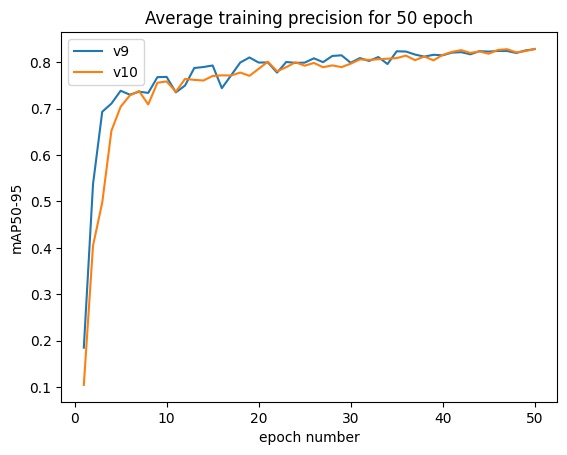

In [ ]:
datav9 = pd.read_csv(f"{HOME}/runs/detect/v9_epoch50/results.csv")
datav10 = pd.read_csv(f"{HOME}/runs/detect/v10_epoch50/results.csv")

plt.plot(datav9['epoch'], datav9['metrics/mAP50-95(B)'])
plt.plot(datav10['epoch'], datav10['metrics/mAP50-95(B)'])
plt.legend(["v9", "v10"])
plt.xlabel("epoch number")
plt.ylabel("mAP50-95")
plt.title("Average training precision for 50 epoch")

In [ ]:
dataset = version.download("yolov9")
model = YOLO("yolov9s.pt")
model.info()
results = model.train(name="v9_epoch100", data=f"{dataset.location}/data.yaml", batch=12, epochs=100, imgsz=640)

YOLOv9s summary: 917 layers, 7,318,368 parameters, 0 gradients, 27.6 GFLOPs
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/datasets/chess-pieces-2/data.yaml, epochs=100, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v9_epoch100, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

train: Scanning /content/datasets/chess-pieces-2/train/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/chess-pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.220780ebecb8e59ab9cc30c7d9856deb.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/chess-pieces-2/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs/detect/v9_epoch100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/v9_epoch100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.94G      1.443      3.935      1.192        355        640: 100%|██████████| 17/17 [00:11<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         58        386      0.145      0.565      0.279      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.91G      1.091      1.589      1.019        181        640: 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]


                   all         58        386      0.585       0.74      0.706      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.92G      1.043      1.092       1.01        137        640: 100%|██████████| 17/17 [00:07<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         58        386      0.874      0.845      0.944      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.94G      0.972     0.8755     0.9776        195        640: 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]


                   all         58        386       0.93      0.905      0.973      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.94G      1.017     0.7713          1        122        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         58        386      0.973      0.952      0.979      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.95G      1.005     0.7125     0.9858        201        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386      0.919      0.957       0.98      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.01G     0.9871     0.6891     0.9841        289        640: 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]


                   all         58        386      0.914      0.936      0.976      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.04G     0.9643     0.6498     0.9859        128        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         58        386      0.951      0.938      0.981      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.16G      0.956     0.5989     0.9696        172        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         58        386      0.964      0.963      0.985      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.02G     0.9528     0.5978     0.9712        185        640: 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         58        386      0.977      0.977      0.986      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.08G     0.8976     0.5463     0.9539         96        640: 100%|██████████| 17/17 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         58        386      0.985      0.971      0.988      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.02G      0.878     0.5338     0.9497        133        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         58        386      0.967      0.974      0.987      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.96G      0.873     0.5159     0.9503         82        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         58        386      0.979      0.964      0.988       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.95G     0.8385     0.5129     0.9237        147        640: 100%|██████████| 17/17 [00:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         58        386      0.979       0.99      0.988      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.1G     0.8647     0.5098     0.9477        175        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         58        386      0.973      0.993      0.986      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.1G     0.8618     0.5197     0.9384        201        640: 100%|██████████| 17/17 [00:09<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         58        386      0.981      0.981      0.987      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.96G      0.835     0.4823     0.9372        170        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         58        386      0.977      0.982      0.989      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.92G     0.8134     0.4803     0.9398        188        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         58        386      0.978      0.978       0.99      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.03G     0.8149     0.4562      0.941        147        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386      0.981      0.966      0.987       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       3.9G     0.7983     0.4434      0.919        236        640: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         58        386      0.969      0.982      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.02G     0.8149      0.448     0.9454        185        640: 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         58        386      0.982      0.985      0.984      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.94G     0.8229     0.4451     0.9291         81        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         58        386      0.983      0.993      0.985      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.95G     0.7946     0.4261     0.9266        258        640: 100%|██████████| 17/17 [00:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         58        386      0.978      0.991      0.986      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         4G     0.7634     0.4093     0.9181        189        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         58        386      0.985      0.981      0.987      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.99G     0.7772     0.4073     0.9194        233        640: 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         58        386      0.979      0.977      0.987      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.93G      0.804     0.4159     0.9395        124        640: 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         58        386      0.981       0.98      0.986      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.89G     0.7631     0.4046     0.9132        228        640: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         58        386      0.981      0.992      0.986      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.97G     0.7609     0.4027     0.9186        217        640: 100%|██████████| 17/17 [00:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         58        386      0.986       0.99      0.986        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.96G       0.73     0.3807     0.9099         76        640: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         58        386      0.983      0.989      0.985      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         4G     0.7421      0.402     0.9013        173        640: 100%|██████████| 17/17 [00:10<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         58        386      0.978      0.991      0.986      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.01G     0.7586     0.4028     0.9153        206        640: 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         58        386      0.977      0.987      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.94G      0.743     0.3811     0.9203        136        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         58        386       0.98      0.986      0.989      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.94G     0.7503     0.3946     0.9334        193        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         58        386      0.977      0.985      0.986      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.27G      0.764      0.414     0.9103        102        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         58        386      0.983      0.974       0.99      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       3.9G     0.7575     0.3995      0.911        156        640: 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         58        386       0.98      0.982      0.987      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.96G     0.7707     0.3981     0.9259        163        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]


                   all         58        386      0.975      0.985      0.985      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.01G     0.7641     0.3814     0.9266        148        640: 100%|██████████| 17/17 [00:10<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]


                   all         58        386      0.977      0.984      0.986      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.96G     0.7299     0.3702     0.9184        170        640: 100%|██████████| 17/17 [00:06<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         58        386       0.98      0.984      0.986      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.2G     0.7345     0.3692     0.8991        214        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         58        386      0.974       0.99      0.986      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.88G     0.7243      0.372     0.9147        194        640: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         58        386      0.978      0.993      0.987      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.87G     0.7114     0.3542     0.9056        199        640: 100%|██████████| 17/17 [00:09<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         58        386      0.983      0.989      0.986      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.13G      0.713     0.3619     0.8928        191        640: 100%|██████████| 17/17 [00:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         58        386      0.978      0.988      0.986      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.93G     0.7156     0.3759     0.8965        176        640: 100%|██████████| 17/17 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         58        386      0.982      0.989      0.986      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         4G     0.7413     0.3768     0.9282        213        640: 100%|██████████| 17/17 [00:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         58        386      0.973       0.99      0.987      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.18G     0.7468     0.3727     0.9127        117        640: 100%|██████████| 17/17 [00:06<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         58        386      0.981      0.993      0.986      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.94G     0.7218     0.3663     0.9001        224        640: 100%|██████████| 17/17 [00:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         58        386      0.981      0.986      0.986      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.12G     0.7165     0.3577     0.8978        168        640: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


                   all         58        386      0.983      0.985      0.988      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.94G     0.7015     0.3424     0.9027        132        640: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


                   all         58        386      0.974      0.981      0.987      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.9G     0.7111     0.3578     0.9034        181        640: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         58        386      0.979      0.985      0.988      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.08G     0.7425     0.3486     0.9236        285        640: 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]


                   all         58        386      0.973      0.984      0.989      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.26G     0.7216     0.3627     0.8964        143        640: 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         58        386       0.98      0.987      0.988      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.95G      0.702     0.3559     0.9036        193        640: 100%|██████████| 17/17 [00:07<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         58        386      0.987      0.986      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.97G     0.6905     0.3442     0.9051         88        640: 100%|██████████| 17/17 [00:09<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         58        386      0.984      0.987      0.989      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.37G      0.698      0.346     0.8928        158        640: 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         58        386      0.978      0.985      0.989      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.94G     0.6989     0.3445     0.9038        144        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         58        386      0.971       0.98      0.989      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.24G     0.6994     0.3472     0.9128        230        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         58        386      0.969      0.984      0.989      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.94G     0.6775     0.3317     0.8999        167        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         58        386      0.982      0.987      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.92G     0.6844     0.3295     0.9016        144        640: 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         58        386      0.986      0.987      0.985      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.87G      0.718     0.3449     0.9251        166        640: 100%|██████████| 17/17 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         58        386      0.979       0.99      0.985      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.15G     0.7068     0.3402     0.9115        111        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         58        386      0.979      0.993      0.987      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.12G     0.7032     0.3357     0.9168         60        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all         58        386      0.981      0.984      0.987      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.98G     0.6859     0.3327     0.8893        237        640: 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         58        386      0.983      0.986      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.92G     0.6776     0.3221     0.8999        120        640: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


                   all         58        386      0.978      0.987      0.986      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.14G     0.6992     0.3306     0.8972        245        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]


                   all         58        386      0.984      0.986      0.986      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.1G     0.6667     0.3132      0.903        188        640: 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         58        386      0.987      0.988      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.86G     0.6836     0.3209     0.8965        196        640: 100%|██████████| 17/17 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         58        386      0.985      0.985      0.987       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.95G     0.6734     0.3198     0.8924        212        640: 100%|██████████| 17/17 [00:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         58        386      0.981      0.986      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.97G     0.6752     0.3233     0.8865        182        640: 100%|██████████| 17/17 [00:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         58        386      0.979      0.987      0.986      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.01G     0.6852     0.3219     0.9151        128        640: 100%|██████████| 17/17 [00:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         58        386      0.972      0.985      0.982      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.07G     0.6787     0.3273      0.894        157        640: 100%|██████████| 17/17 [00:06<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         58        386      0.978      0.983      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.03G     0.6825     0.3242     0.9107        311        640: 100%|██████████| 17/17 [00:10<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         58        386      0.981      0.984      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.16G     0.6644     0.3174     0.8989        180        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386      0.976      0.986      0.988      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.97G      0.667     0.3114     0.8951        255        640: 100%|██████████| 17/17 [00:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         58        386      0.977      0.984      0.987      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.07G     0.6676      0.314      0.897        269        640: 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         58        386      0.981      0.986      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.95G     0.6717     0.3159     0.8922        181        640: 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         58        386      0.979      0.992      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.97G     0.6762     0.3238       0.89         93        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         58        386      0.978       0.99      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.02G     0.6762      0.324     0.8997         65        640: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         58        386      0.976      0.989      0.987      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.23G     0.6931     0.3247     0.8908        107        640: 100%|██████████| 17/17 [00:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         58        386      0.981      0.984      0.987      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.88G     0.6795     0.3143     0.9046        126        640: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         58        386      0.979      0.986      0.986      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.14G     0.6637     0.3202      0.882        213        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         58        386      0.985      0.983      0.987      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.99G      0.694     0.3223     0.9082        212        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         58        386      0.984      0.986      0.986      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.93G     0.6535     0.2996     0.8879        169        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         58        386      0.985      0.987      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.92G     0.6658     0.3125     0.8895        243        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         58        386      0.987      0.986      0.986      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.9G     0.6423     0.3037     0.8824        277        640: 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         58        386      0.986      0.984      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.05G     0.6584     0.3017     0.8936        196        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         58        386      0.986      0.984      0.985       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.06G     0.6486     0.3011     0.8824        241        640: 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         58        386      0.987      0.983      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.95G     0.6575     0.3066     0.8924        197        640: 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         58        386      0.984      0.984      0.985      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.98G      0.649     0.3004     0.8919        142        640: 100%|██████████| 17/17 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         58        386      0.982      0.984      0.986      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.88G     0.6346     0.2981     0.8819        253        640: 100%|██████████| 17/17 [00:10<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         58        386      0.978      0.984      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.91G      0.662      0.304     0.9003        167        640: 100%|██████████| 17/17 [00:07<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         58        386      0.978      0.984      0.987      0.822


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.88G      0.634     0.2639     0.9002        109        640: 100%|██████████| 17/17 [00:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         58        386      0.978      0.985      0.987       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.88G     0.6316     0.2786     0.9037        125        640: 100%|██████████| 17/17 [00:11<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         58        386      0.981      0.983      0.987      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.88G     0.6273     0.2698      0.911        109        640: 100%|██████████| 17/17 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         58        386      0.978      0.984      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.89G     0.6127     0.2596     0.8981         97        640: 100%|██████████| 17/17 [00:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]


                   all         58        386      0.983      0.983      0.988      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.88G      0.613     0.2637     0.8843         60        640: 100%|██████████| 17/17 [00:07<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         58        386      0.983      0.985      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.89G     0.6028      0.253     0.9001        119        640: 100%|██████████| 17/17 [00:08<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]


                   all         58        386      0.984      0.984      0.987      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.88G     0.6052      0.259     0.8771        145        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         58        386      0.983      0.984      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.88G     0.5962     0.2538     0.8895         30        640: 100%|██████████| 17/17 [00:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         58        386      0.982      0.984      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.89G     0.6013     0.2614      0.883         95        640: 100%|██████████| 17/17 [00:10<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         58        386      0.982      0.984      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.87G     0.5998     0.2539     0.8811        137        640: 100%|██████████| 17/17 [00:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         58        386      0.982      0.984      0.987       0.82



100 epochs completed in 0.328 hours.
Optimizer stripped from runs/detect/v9_epoch100/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/v9_epoch100/weights/best.pt, 15.2MB

Validating runs/detect/v9_epoch100/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,172,119 parameters, 0 gradients, 26.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


                   all         58        386      0.981      0.984      0.987      0.826
          black-bishop         13         22          1      0.899       0.96      0.717
            black-king         29         29      0.996          1      0.995      0.881
          black-knight         26         30          1      0.942      0.995      0.859
            black-pawn         25         77      0.997          1      0.995      0.803
           black-queen         11         11       0.94          1      0.995      0.852
            black-rook         24         28      0.988          1      0.995       0.83
          white-bishop         17         22      0.948          1       0.96      0.787
            white-king         29         29      0.993          1      0.995      0.877
          white-knight         17         19      0.939          1      0.982      0.813
            white-pawn         26         77      0.997          1      0.995      0.796
           white-quee

In [ ]:
dataset = version.download("yolov8")
model = YOLO("yolov10s.pt")
model.info()
results = model.train(name="v10_epoch100", data=f"{dataset.location}/data.yaml", batch=12, epochs=100, imgsz=640)

YOLOv10s summary: 402 layers, 8,128,272 parameters, 0 gradients, 25.1 GFLOPs
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/datasets/chess-pieces-2/data.yaml, epochs=100, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=v10_epoch100, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

train: Scanning /content/datasets/chess-pieces-2/train/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/datasets/chess-pieces-2/train/images/26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.220780ebecb8e59ab9cc30c7d9856deb.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/chess-pieces-2/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<?, ?it/s]


Plotting labels to runs/detect/v10_epoch100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.00046875), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/v10_epoch100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.35G      2.839      8.981      2.167        355        640: 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         58        386      0.185        0.3      0.149      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.21G      2.177      4.077      1.931        181        640: 100%|██████████| 17/17 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


                   all         58        386      0.365      0.664      0.579      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.2G      2.124      2.796      1.906        137        640: 100%|██████████| 17/17 [00:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         58        386      0.611      0.675      0.715      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.19G      2.034        2.2      1.847        195        640: 100%|██████████| 17/17 [00:06<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         58        386      0.697      0.846      0.916      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.18G      2.048      1.864      1.871        122        640: 100%|██████████| 17/17 [00:09<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]


                   all         58        386      0.868      0.903      0.958      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.24G      2.016       1.64      1.857        201        640: 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         58        386      0.862      0.909      0.945      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.27G      1.991      1.583      1.842        289        640: 100%|██████████| 17/17 [00:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         58        386      0.916      0.932      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.21G      1.886       1.38      1.839        128        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         58        386      0.936      0.908      0.978       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.35G      1.867      1.313      1.817        172        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         58        386      0.907      0.956      0.969      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.28G      1.887      1.259      1.826        185        640: 100%|██████████| 17/17 [00:06<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         58        386      0.924      0.936      0.976      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.37G      1.926      1.198      1.822         96        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         58        386      0.945      0.953      0.969      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.3G      1.803      1.159      1.808        133        640: 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         58        386       0.93      0.959      0.967      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.22G      1.811      1.121      1.812         82        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


                   all         58        386      0.937      0.959      0.978      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.19G      1.796      1.089      1.792        147        640: 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.90it/s]

                   all         58        386       0.96       0.93      0.974      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.17G      1.833      1.074      1.822        175        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         58        386      0.935      0.935      0.964       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.29G      1.712      1.031      1.782        201        640: 100%|██████████| 17/17 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         58        386      0.943      0.925      0.969      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.15G      1.751      1.004      1.792        170        640: 100%|██████████| 17/17 [00:09<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         58        386      0.924      0.954      0.974      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.2G      1.723      1.023      1.806        188        640: 100%|██████████| 17/17 [00:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         58        386      0.964      0.934      0.973      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.31G       1.67     0.9663      1.794        147        640: 100%|██████████| 17/17 [00:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         58        386      0.946      0.956      0.974      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.17G      1.727     0.9894      1.793        236        640: 100%|██████████| 17/17 [00:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


                   all         58        386       0.96      0.969       0.98      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.28G      1.665      0.943      1.816        185        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         58        386       0.95      0.973      0.979      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.16G      1.623     0.9313      1.778         81        640: 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         58        386      0.968      0.978      0.984      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.12G      1.651     0.8745      1.783        258        640: 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]


                   all         58        386      0.952      0.963      0.979      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.16G      1.591     0.8425      1.774        189        640: 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         58        386       0.92      0.984      0.983      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.19G      1.633     0.8555      1.781        233        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         58        386      0.965      0.962      0.981      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.22G      1.662     0.8741      1.814        124        640: 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         58        386      0.951      0.974      0.977      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.19G      1.582     0.8478      1.774        228        640: 100%|██████████| 17/17 [00:08<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         58        386      0.962      0.964      0.981      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.22G      1.583     0.8313      1.777        217        640: 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         58        386       0.95      0.966      0.981        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.21G      1.541     0.7898      1.774         76        640: 100%|██████████| 17/17 [00:08<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         58        386      0.972      0.963      0.984      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.17G      1.566     0.8057      1.752        173        640: 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         58        386      0.957      0.976      0.982      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.28G      1.594     0.8352      1.767        206        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         58        386      0.953      0.968      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.25G      1.534     0.7883      1.786        136        640: 100%|██████████| 17/17 [00:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         58        386      0.977      0.964      0.986      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.08G       1.53       0.79      1.793        193        640: 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         58        386      0.957       0.98      0.985      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.52G      1.528     0.7741      1.752        102        640: 100%|██████████| 17/17 [00:06<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         58        386      0.964      0.974      0.987      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.19G      1.519     0.7855       1.76        156        640: 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         58        386      0.978      0.964      0.986      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.27G      1.555     0.7863      1.777        163        640: 100%|██████████| 17/17 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         58        386       0.95      0.975      0.984      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.19G      1.578     0.7602      1.787        148        640: 100%|██████████| 17/17 [00:07<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         58        386      0.971      0.972      0.985      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.27G      1.571     0.7738      1.779        170        640: 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         58        386      0.968      0.969      0.985      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.49G      1.521     0.7529      1.744        214        640: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         58        386       0.98      0.975      0.988      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.14G      1.534     0.7919      1.778        194        640: 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         58        386      0.949      0.987      0.988      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.13G       1.52     0.7593      1.771        199        640: 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         58        386      0.974      0.939      0.986      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.4G      1.493     0.7406      1.743        191        640: 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.60it/s]

                   all         58        386      0.974      0.989      0.988      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.21G      1.467     0.7561      1.742        176        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         58        386      0.977      0.985      0.988      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.26G      1.511      0.745      1.782        213        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         58        386      0.972      0.987      0.987      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.46G      1.502     0.7411      1.756        117        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         58        386      0.963      0.975      0.987      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.18G      1.499     0.7283      1.743        224        640: 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         58        386      0.943      0.985      0.982      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.29G      1.509     0.7311      1.752        168        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         58        386      0.965       0.96      0.981      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.25G      1.464     0.6971      1.761        132        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         58        386      0.968      0.983      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.16G      1.473     0.7188      1.755        181        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         58        386      0.971      0.983      0.986       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.36G      1.495     0.6824      1.788        285        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         58        386      0.984      0.986      0.989      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.57G      1.461     0.6866      1.733        143        640: 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         58        386      0.977       0.99      0.988      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.22G      1.453     0.7055      1.753        193        640: 100%|██████████| 17/17 [00:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         58        386      0.972      0.982      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.15G      1.413      0.681      1.756         88        640: 100%|██████████| 17/17 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         58        386      0.973       0.97      0.983      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.65G      1.456     0.7091      1.741        158        640: 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         58        386      0.977      0.978      0.986      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.11G      1.449     0.6894      1.754        144        640: 100%|██████████| 17/17 [00:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         58        386      0.981      0.963      0.984      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.53G       1.45       0.69      1.765        230        640: 100%|██████████| 17/17 [00:09<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         58        386      0.969      0.962      0.983       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.24G      1.433     0.6696      1.754        167        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         58        386      0.968      0.972      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       4.2G      1.421      0.659       1.76        144        640: 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         58        386      0.978      0.972      0.986      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.14G      1.489     0.6789      1.789        166        640: 100%|██████████| 17/17 [00:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


                   all         58        386      0.985      0.979      0.986      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.31G      1.433     0.6706      1.761        111        640: 100%|██████████| 17/17 [00:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         58        386       0.96      0.962      0.985      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.34G      1.459     0.6676      1.774         60        640: 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         58        386      0.957      0.975      0.982      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.24G       1.38     0.6394      1.726        237        640: 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         58        386      0.979      0.981      0.987       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       4.2G       1.37     0.6293      1.738        120        640: 100%|██████████| 17/17 [00:06<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         58        386       0.97      0.982      0.986      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       4.4G      1.433     0.6521      1.744        245        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         58        386      0.978      0.981      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.36G      1.373     0.6343      1.762        188        640: 100%|██████████| 17/17 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         58        386      0.957      0.983      0.987      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.12G       1.41     0.6469      1.741        196        640: 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         58        386      0.971      0.971      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.27G      1.374     0.6211      1.733        212        640: 100%|██████████| 17/17 [00:06<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         58        386      0.961      0.988      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.22G      1.379     0.6403      1.728        182        640: 100%|██████████| 17/17 [00:07<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         58        386      0.961      0.989      0.986      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.28G      1.396     0.6525      1.774        128        640: 100%|██████████| 17/17 [00:07<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         58        386      0.969      0.987      0.986      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.36G      1.413     0.6658      1.741        157        640: 100%|██████████| 17/17 [00:07<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         58        386      0.977      0.973      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       4.3G        1.4      0.646      1.763        311        640: 100%|██████████| 17/17 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


                   all         58        386       0.98       0.98      0.985      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.46G      1.349     0.6241      1.746        180        640: 100%|██████████| 17/17 [00:06<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         58        386      0.982      0.971      0.987      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.22G      1.369      0.618      1.735        255        640: 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         58        386      0.983      0.976      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.25G      1.367     0.6216      1.749        269        640: 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         58        386      0.985      0.978      0.989      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.21G      1.378     0.6184      1.737        181        640: 100%|██████████| 17/17 [00:08<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]

                   all         58        386      0.979      0.978      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.23G      1.399     0.6459      1.742         93        640: 100%|██████████| 17/17 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         58        386      0.984      0.981      0.988      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.32G      1.361     0.6292      1.739         65        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         58        386      0.977      0.987      0.988      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.4G      1.402     0.6209      1.735        107        640: 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         58        386      0.984      0.976      0.987      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.21G      1.365     0.6047      1.755        126        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]


                   all         58        386      0.972      0.981      0.988      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.3G      1.306     0.5977      1.712        213        640: 100%|██████████| 17/17 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         58        386      0.981      0.977      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.22G      1.335     0.6024      1.739        212        640: 100%|██████████| 17/17 [00:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]


                   all         58        386      0.982      0.983      0.989      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.19G      1.312     0.5688      1.719        169        640: 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         58        386      0.966      0.986      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       4.2G      1.358     0.5988      1.732        243        640: 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         58        386      0.978      0.966      0.989      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.18G      1.303     0.5914       1.71        277        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         58        386      0.981      0.957      0.989      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.35G      1.321     0.5781      1.736        196        640: 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]


                   all         58        386      0.974      0.987      0.989      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.34G      1.301     0.5649       1.71        241        640: 100%|██████████| 17/17 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         58        386       0.98      0.982      0.989      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.13G      1.328     0.5988      1.726        197        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         58        386      0.981       0.99      0.988      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.15G      1.296     0.5705      1.732        142        640: 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         58        386      0.984      0.989      0.989      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.16G      1.273     0.5688      1.719        253        640: 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         58        386      0.983      0.993      0.989      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.19G      1.341     0.5892      1.747        167        640: 100%|██████████| 17/17 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         58        386      0.981       0.98      0.988      0.819


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.06G      1.246     0.5154      1.729        109        640: 100%|██████████| 17/17 [00:12<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         58        386       0.98      0.973      0.988      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.06G      1.264     0.5239      1.739        125        640: 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         58        386      0.984      0.959      0.986      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.07G      1.236     0.5091       1.75        109        640: 100%|██████████| 17/17 [00:08<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         58        386      0.982      0.965      0.987      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.07G      1.219     0.4856      1.725         97        640: 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         58        386      0.974      0.978      0.987      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.06G       1.19     0.4871      1.701         60        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         58        386      0.979      0.975      0.986       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.07G      1.176      0.473       1.73        119        640: 100%|██████████| 17/17 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]


                   all         58        386       0.98      0.975      0.987       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.07G      1.191      0.486      1.696        145        640: 100%|██████████| 17/17 [00:09<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         58        386      0.974       0.98      0.987       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.07G      1.162     0.4678      1.721         30        640: 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


                   all         58        386      0.977      0.983      0.987      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.06G      1.177     0.4822      1.705         95        640: 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         58        386      0.973      0.982      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.06G      1.169     0.4717      1.699        137        640: 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         58        386      0.975      0.979      0.988      0.827



100 epochs completed in 0.301 hours.
Optimizer stripped from runs/detect/v10_epoch100/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/v10_epoch100/weights/best.pt, 16.5MB

Validating runs/detect/v10_epoch100/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,045,022 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


                   all         58        386      0.985      0.978      0.989      0.833
          black-bishop         13         22          1      0.843      0.962      0.724
            black-king         29         29          1      0.994      0.995      0.863
          black-knight         26         30      0.995          1      0.995      0.858
            black-pawn         25         77      0.998      0.974      0.995      0.816
           black-queen         11         11      0.971          1      0.995      0.863
            black-rook         24         28          1          1      0.995      0.801
          white-bishop         17         22      0.945          1      0.991      0.832
            white-king         29         29      0.988          1      0.995      0.873
          white-knight         17         19      0.949      0.976      0.982       0.83
            white-pawn         26         77          1      0.981      0.995      0.817
           white-quee

Text(0.5, 1.0, 'Average training precision for 100 epoch')

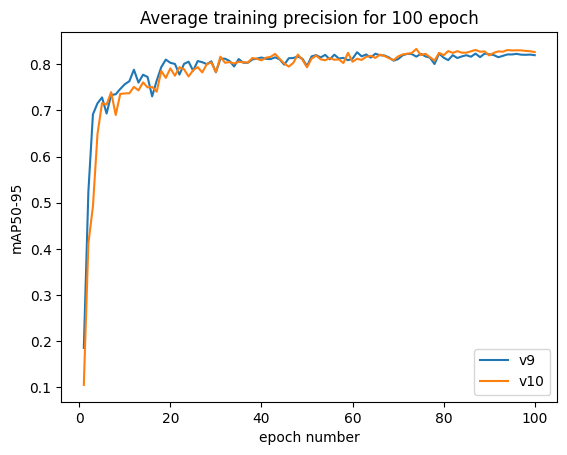

In [ ]:
datav9 = pd.read_csv(f"{HOME}/runs/detect/v9_epoch100/results.csv")
datav10 = pd.read_csv(f"{HOME}/runs/detect/v10_epoch100/results.csv")

plt.plot(datav9['epoch'], datav9['metrics/mAP50-95(B)'])
plt.plot(datav10['epoch'], datav10['metrics/mAP50-95(B)'])
plt.legend(["v9", "v10"])
plt.xlabel("epoch number")
plt.ylabel("mAP50-95")
plt.title("Average training precision for 100 epoch")

In [ ]:
epoch100v9 = datav9['metrics/mAP50-95(B)'][99]
epoch100v10 = datav10['metrics/mAP50-95(B)'][99]
epoch50v9 = datav9['metrics/mAP50-95(B)'][49]
epoch50v10 = datav10['metrics/mAP50-95(B)'][49]
epoch20v9 = datav9['metrics/mAP50-95(B)'][19]
epoch20v10 = datav10['metrics/mAP50-95(B)'][19]

md_text = "### Average Precision from YOLOv9 and YOLOv10 trained on chesspiece dataset from roboflow\n"
display(Markdown(md_text))
md_text = f"|Epoch|YOLOv9|YOLOv10|\n| -------- | ------- | ------- | \n| 20  | {epoch20v9}|{epoch20v10}|\n| 50  | {epoch50v9}|{epoch50v10}|\n| 100  | {epoch100v9}|{epoch100v10}|"
display(Markdown(md_text))

### Average Precision from YOLOv9 and YOLOv10 trained on chesspiece dataset from roboflow


|Epoch|YOLOv9|YOLOv10|
| -------- | ------- | ------- | 
| 20  | 0.80332|0.79139|
| 50  | 0.79613|0.79362|
| 100  | 0.81988|0.82665|

## **Proposed Workflow Sample**

In [ ]:
epoch_no = 100
if epoch_no < 100:
  dataset = version.download("yolov9")
  model = YOLO("yolov9s.pt")
  model.info()
  results = model.train(name=f"v9_epoch{epoch_no}", data=f"{dataset.location}/data.yaml", batch=12, epochs=epoch_no, imgsz=640)
elif epoch_no > 100:
  dataset = version.download("yolov8")
  model = YOLO("yolov10s.pt")
  model.info()
  results = model.train(name=f"v10_epoch{epoch_no}", data=f"{dataset.location}/data.yaml", batch=12, epochs=epoch_no, imgsz=640)
